<a href="https://colab.research.google.com/github/harabou/DSAIcourse2025/blob/main/%2307/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# CSVファイルのデータを読み込む
fpath='https://raw.githubusercontent.com/harabou/DS-AI_course/refs/heads/main/%2303/hospital.csv'
df = pd.read_csv(fpath,header=0)

df




,shisetsu,jikan
0,A,500
1,A,420
2,A,650
3,A,550
4,A,480
5,B,400
6,B,420
7,B,460
8,B,540
9,B,390


In [3]:
# DataFrameのカラム名を確認
print(df.columns)

# olsモデルで分散分析を実行するための式を定義（式を修正）
# 'result'をDataFrameの正しいカラム名に変更 'インデックス1'
formula = 'jikan ~shisetsu'  # 'インデックス1'カラムを使用
model = ols(formula, data=df).fit()

# 分散分析の結果を計算
aov_table = anova_lm(model, typ=2)
aov_table.columns = ["Sum of Square", "DF", "F ratio", "p-value"]

# 結果を表示
print(aov_table)



Index(['shisetsu', 'jikan'], dtype='object')
          Sum of Square    DF   F ratio  p-value
shisetsu   57773.333333   2.0  4.885006  0.02805
Residual   70960.000000  12.0       NaN      NaN


In [4]:
!pip install statsmodels
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # Import pairwise_tukeyhsd

print(pairwise_tukeyhsd(df['jikan'], df['shisetsu']))


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B    -78.0 0.2816 -207.7507  51.7507  False
     A      C   -152.0 0.0221 -281.7507 -22.2493   True
     B      C    -74.0 0.3159 -203.7507  55.7507  False
-------------------------------------------------------


                Sum of Square    DF    F ratio   p-value
C(drug)             52.469227   2.0   5.281671  0.009895
C(sex)              87.862457   1.0  17.688867  0.000171
C(drug):C(sex)      33.602391   2.0   3.382493  0.045392
Residual           173.848669  35.0        NaN       NaN


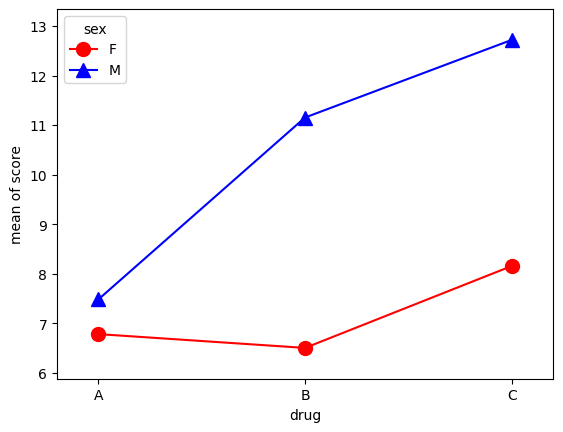

In [5]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

# CSVファイルのデータを読み込む
fpath='https://raw.githubusercontent.com/harabou/DS-AI_course/refs/heads/main/%2303/2way.csv'
df = pd.read_csv(fpath,header=0)

#グラフ化
fig = interaction_plot(df.drug, df.sex, df.score,
         colors=['red','blue'], markers=['o','^'], ms=10)

# olsモデルで分散分析を実行するための式を定義
formula = 'score ~ C(drug) + C(sex) + C(drug):C(sex)'
model = ols(formula, data=df).fit()

# 分散分析の結果を計算
aov_table = anova_lm(model, typ=2)
aov_table.columns = ["Sum of Square", "DF", "F ratio", "p-value"]

# 結果を表示
print(aov_table)

In [11]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM  # Import AnovaRM

# Example with one within-subject factor
data = pd.DataFrame({
    'subject': ['D1','D1','D1', 'D2','D2','D2', 'D3','D3','D3', 'D4','D4','D4', 'D5','D5','D5',
                'D6','D6','D6', 'D7','D7','D7', 'D8','D8','D8', 'D9','D9','D9', 'D10','D10','D10',
                'D11','D11','D11', 'D12','D12','D12'],
    'time': ['A','B','C', 'A','B','C', 'A','B','C','A','B','C', 'A','B','C','A','B','C',
                  'A','B','C', 'A','B','C', 'A','B','C','A','B','C', 'A','B','C','A','B','C', ],
    'bp': [119,113,114, 125,109,113,110,115,112,108,98,104,123,126,111,133,118,117,130,127,100,125,114,110,121,115,124,113,107,106,135,125,115,126,118,110]
})

# Ensure the 'time' variable is treated as categorical
data['time'] = pd.Categorical(data['time'])


rm_anova = AnovaRM(data, 'bp', 'subject', within=['time'])
results = rm_anova.fit()
print(results.summary())

              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
time  9.8036 2.0000 22.0000 0.0009



In [13]:
# CSVファイルのデータを読み込む
fpath='https://raw.githubusercontent.com/harabou/DS-AI_course/refs/heads/main/%2303/bp_long.csv'
df = pd.read_csv(fpath,header=0)

df

,Obs,dose,id,time,sbp
0,1,D1,R1,t0,119
1,1,D1,R1,t1,113
2,1,D1,R1,t3,114
3,2,D2,S1,t0,125
4,2,D2,S1,t1,109
5,2,D2,S1,t3,113
6,3,D1,R2,t0,110
7,3,D1,R2,t1,115
8,3,D1,R2,t3,112
9,4,D2,S2,t0,108


In [14]:
# Ensure the 'time' variable is treated as categorical
df['time'] = pd.Categorical(data['time'])


rm_anova = AnovaRM(df, 'sbp', 'Obs', within=['time'])
results = rm_anova.fit()
print(results.summary())



              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
time  9.8036 2.0000 22.0000 0.0009



In [15]:
# Perform Repeated Measures ANOVA
aovrm = AnovaRM(df, 'sbp', 'Obs', within=['time'])
res = aovrm.fit()
print(res.summary())

              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
time  9.8036 2.0000 22.0000 0.0009



In [17]:
# Example with one within-subject factor and one between-subject factor

fpath='https://raw.githubusercontent.com/harabou/DS-AI_course/refs/heads/main/%2303/bp_long.csv'
df = pd.read_csv(fpath,header=0)

df
# Ensure the 'time' and 'group' variables are treated as categorical
df['time'] = pd.Categorical(df['time'])
df['dose'] = pd.Categorical(df['dose'])

formula = 'sbp ~ C(dose) * C(time)'

model = ols(formula, data=df).fit()
import statsmodels.api as sm
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                      sum_sq    df         F    PR(>F)
C(dose)           182.250000   1.0  3.166200  0.085311
C(time)           742.055556   2.0  6.445806  0.004691
C(dose):C(time)   115.166667   2.0  1.000386  0.379675
Residual         1726.833333  30.0       NaN       NaN
